In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import sklearn
import seaborn as sns
from sklearn import neighbors
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
import warnings
warnings.filterwarnings("ignore")

# Loading_The_Data_Set

In [2]:
df = pd.read_csv('NVDA.csv')

In [3]:
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-05-23,37.422501,37.422501,36.227501,36.830002,36.579872,59184400
1,2019-05-24,37.020000,37.375000,36.220001,36.287498,36.041054,35758400
2,2019-05-28,36.465000,36.794998,35.812500,35.832500,35.589134,42835600
3,2019-05-29,35.352501,35.705002,34.735001,35.084999,34.846722,55980000
4,2019-05-30,35.077499,35.437500,34.392502,34.777500,34.580738,39430000
...,...,...,...,...,...,...,...
1255,2024-05-17,943.690002,947.400024,918.059998,924.789978,924.789978,35969100
1256,2024-05-20,937.500000,952.000000,934.400024,947.799988,947.799988,31876400
1257,2024-05-21,935.989990,954.000000,931.799988,953.859985,953.859985,32894600
1258,2024-05-22,954.590027,960.200012,932.489990,949.500000,949.500000,53725900


In [4]:
df.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [5]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1260.000000,1260.000000,1260.000000,1260.000000,1260.000000,1.260000e+03
mean,236.259629,240.632726,231.748678,236.457376,236.246529,4.549841e+07
std,203.974380,207.537564,200.074702,204.085654,204.154064,1.842901e+07
min,33.977501,34.367500,33.150002,33.445000,33.255783,9.788400e+06
25%,116.956251,121.027501,114.323750,116.508123,116.403095,3.235795e+07
50%,168.160004,171.879997,164.275002,169.110001,169.027069,4.278820e+07
75%,277.930008,283.807510,272.702507,278.057495,277.813087,5.514575e+07
max,1020.000000,1063.199951,1015.200012,1058.918579,1058.918579,1.543911e+08


# Graph_Plot_Of_Stock_Prices

Text(0.5, 1.0, 'Closing Stock Price')

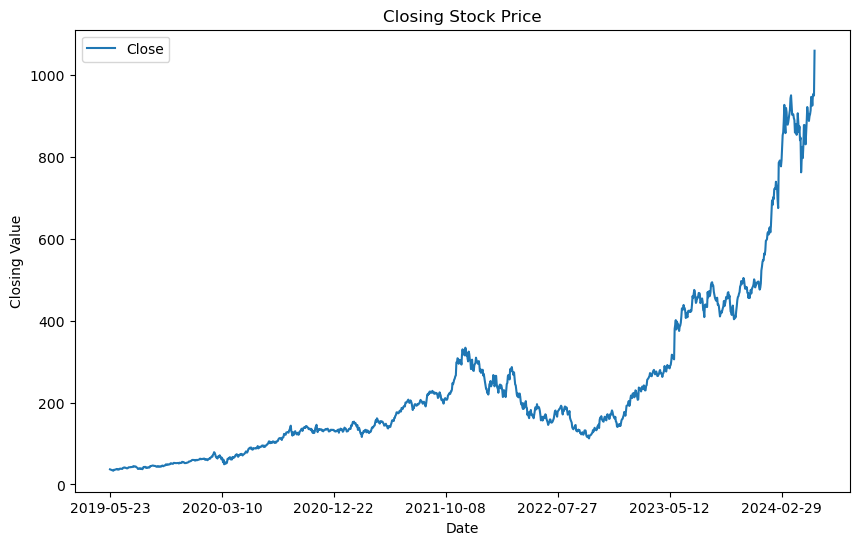

In [6]:
ax = df[['Date', 'Close']].groupby('Date').mean().plot(figsize=(10,6))
plt.ylabel('Closing Value')
plt.title('Closing Stock Price')

# Data_Mining

In [7]:
df['Tomorrow'] = df['Close'].shift(-1)
df

,Date,Open,High,Low,Close,Adj Close,Volume,Tomorrow
0,2019-05-23,37.422501,37.422501,36.227501,36.830002,36.579872,59184400,36.287498
1,2019-05-24,37.020000,37.375000,36.220001,36.287498,36.041054,35758400,35.832500
2,2019-05-28,36.465000,36.794998,35.812500,35.832500,35.589134,42835600,35.084999
3,2019-05-29,35.352501,35.705002,34.735001,35.084999,34.846722,55980000,34.777500
4,2019-05-30,35.077499,35.437500,34.392502,34.777500,34.580738,39430000,33.865002
...,...,...,...,...,...,...,...,...
1255,2024-05-17,943.690002,947.400024,918.059998,924.789978,924.789978,35969100,947.799988
1256,2024-05-20,937.500000,952.000000,934.400024,947.799988,947.799988,31876400,953.859985
1257,2024-05-21,935.989990,954.000000,931.799988,953.859985,953.859985,32894600,949.500000
1258,2024-05-22,954.590027,960.200012,932.489990,949.500000,949.500000,53725900,1058.918579


In [8]:
df['Target'] = (df['Tomorrow']>df['Close']).astype(int)
df1 = df.dropna()
df1

,Date,Open,High,Low,Close,Adj Close,Volume,Tomorrow,Target
0,2019-05-23,37.422501,37.422501,36.227501,36.830002,36.579872,59184400,36.287498,0
1,2019-05-24,37.020000,37.375000,36.220001,36.287498,36.041054,35758400,35.832500,0
2,2019-05-28,36.465000,36.794998,35.812500,35.832500,35.589134,42835600,35.084999,0
3,2019-05-29,35.352501,35.705002,34.735001,35.084999,34.846722,55980000,34.777500,0
4,2019-05-30,35.077499,35.437500,34.392502,34.777500,34.580738,39430000,33.865002,0
...,...,...,...,...,...,...,...,...,...
1254,2024-05-16,949.099976,958.190002,941.030029,943.590027,943.590027,32395200,924.789978,0
1255,2024-05-17,943.690002,947.400024,918.059998,924.789978,924.789978,35969100,947.799988,1
1256,2024-05-20,937.500000,952.000000,934.400024,947.799988,947.799988,31876400,953.859985,1
1257,2024-05-21,935.989990,954.000000,931.799988,953.859985,953.859985,32894600,949.500000,0


In [9]:
df1['Target'].value_counts()/df.shape[0]

1    0.547619
0    0.451587
Name: Target, dtype: float64

# Predicting_The_Growth_Of Next_Day

In [10]:
x = df1[['High', "Low", "Close", 'Open']]
y = df1['Target']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25)

In [11]:
params = {'n_neighbors' : np.arange(1,21)}
knn = KNeighborsClassifier()
scores = []
cv_param = np.arange(2,20)
for cv_params in cv_param:
    knc = GridSearchCV(knn, params, cv=KFold(cv_params))
    knc.fit(x_train, y_train)
    score_knn = knc.score(x_test,y_test)
    scores.append(score_knn)
best_score_knn = max(scores)
best_params = {'n_neighbors': params['n_neighbors'][np.argmax(scores)]}
print("best score knn: ", best_score_knn)
print("best params", best_params)

best score knn:  0.5174603174603175
best params {'n_neighbors': 2}


In [12]:
n_estimators_range = np.arange(1,121)
accuracy_scores = []
for n_estimators in n_estimators_range:
    rf = RandomForestClassifier(n_estimators=n_estimators)
    rf.fit(x_train, y_train)
    accuracy = rf.score(x_test, y_test)
    accuracy_scores.append(accuracy)
best_accuracy = max(accuracy_scores)
best_n_estimators = n_estimators_range[np.argmax(accuracy_scores)]
print("Best Accuracy rf:", best_accuracy)
print("Best n_estimators:", best_n_estimators)

Best Accuracy rf: 0.5396825396825397
Best n_estimators: 11


In [13]:
kernel_types = ['linear', 'rbf', 'poly', 'sigmoid']
accuracy_scores = {}
for kernel_type in kernel_types:
    svc = SVC(kernel=kernel_type, C=1)
    svc.fit(x_train, y_train)
    accuracy_scores[kernel_type] = svc.score(x_test, y_test)
best_kernel = max(accuracy_scores, key=lambda k: accuracy_scores[k])
best_score = accuracy_scores[best_kernel]
print("Best Kernel:", best_kernel)
print("Best Score:", best_score)

Best Kernel: rbf
Best Score: 0.5682539682539682


In [14]:
C_values = np.arange(1, 20)
accuracy_scores = {}
for C_value in C_values:
    lr = LogisticRegression(C=C_value)
    lr.fit(x_train, y_train)
    accuracy_scores[C_value] = lr.score(x_test, y_test)
best_C = max(accuracy_scores, key=lambda k: accuracy_scores[k])
best_score_lr = accuracy_scores[best_C]
print("Best C:", best_C)
print("Best Score:", best_score_lr)

Best C: 1
Best Score: 0.5555555555555556


# Visualising_Data_Of_Each_Prediction_Of_Classifiers

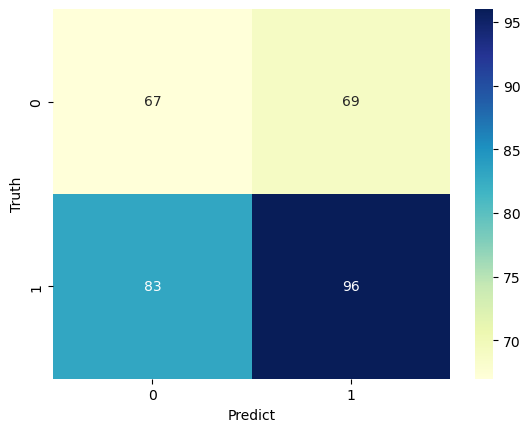

In [15]:
y_predicted = knc.predict(x_test)
cm = confusion_matrix(y_test, y_predicted)
sns.heatmap(cm, annot=True, cmap='YlGnBu')
plt.xlabel('Predict')
plt.ylabel('Truth')
plt.show()

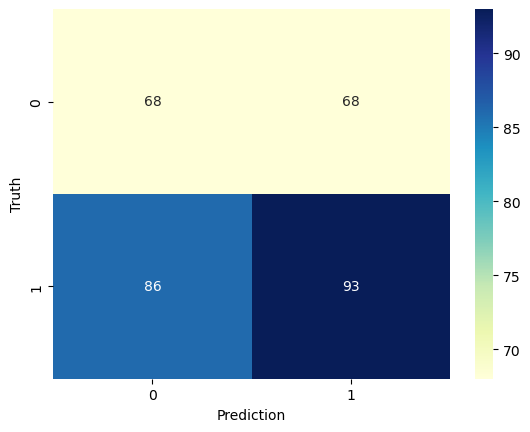

In [16]:
y_predict = rf.predict(x_test)
cm = confusion_matrix(y_test, y_predict)
sns.heatmap(cm, annot=True, cmap = 'YlGnBu')
plt.xlabel('Prediction')
plt.ylabel('Truth')
plt.show()

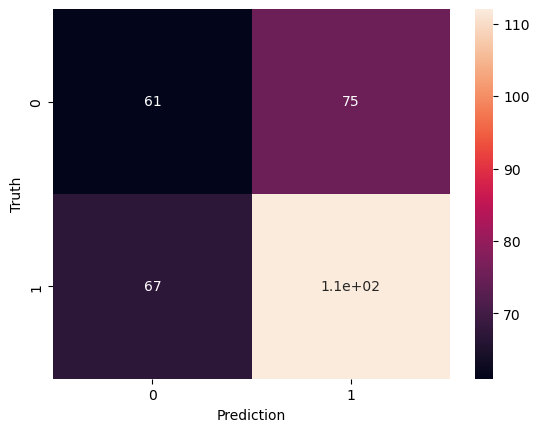

In [17]:
y_predict = svc.predict(x_test)
cm = confusion_matrix(y_test, y_predict)
sns.heatmap(cm, annot=True)
plt.xlabel('Prediction')
plt.ylabel('Truth')
plt.show()

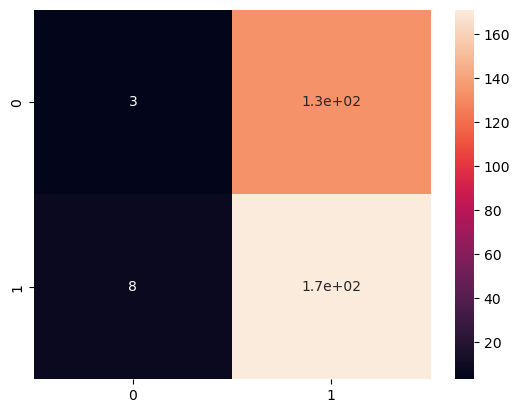

In [18]:
y_predict = lr.predict(x_test)
cm = confusion_matrix(y_test, y_predict)
sns.heatmap(cm, annot=True)
plt.show()

# Price_Prediction

In [19]:
df_stocks = df[['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'Tomorrow']]
df_stocks

,Date,Open,High,Low,Close,Adj Close,Volume,Tomorrow
0,2019-05-23,37.422501,37.422501,36.227501,36.830002,36.579872,59184400,36.287498
1,2019-05-24,37.020000,37.375000,36.220001,36.287498,36.041054,35758400,35.832500
2,2019-05-28,36.465000,36.794998,35.812500,35.832500,35.589134,42835600,35.084999
3,2019-05-29,35.352501,35.705002,34.735001,35.084999,34.846722,55980000,34.777500
4,2019-05-30,35.077499,35.437500,34.392502,34.777500,34.580738,39430000,33.865002
...,...,...,...,...,...,...,...,...
1255,2024-05-17,943.690002,947.400024,918.059998,924.789978,924.789978,35969100,947.799988
1256,2024-05-20,937.500000,952.000000,934.400024,947.799988,947.799988,31876400,953.859985
1257,2024-05-21,935.989990,954.000000,931.799988,953.859985,953.859985,32894600,949.500000
1258,2024-05-22,954.590027,960.200012,932.489990,949.500000,949.500000,53725900,1058.918579


In [20]:
df_stock = df_stocks.dropna()
y = df_stock['Tomorrow']
x = df_stock[['Open', 'High', 'Low', 'Close','Adj Close', 'Volume']]
df_stock

,Date,Open,High,Low,Close,Adj Close,Volume,Tomorrow
0,2019-05-23,37.422501,37.422501,36.227501,36.830002,36.579872,59184400,36.287498
1,2019-05-24,37.020000,37.375000,36.220001,36.287498,36.041054,35758400,35.832500
2,2019-05-28,36.465000,36.794998,35.812500,35.832500,35.589134,42835600,35.084999
3,2019-05-29,35.352501,35.705002,34.735001,35.084999,34.846722,55980000,34.777500
4,2019-05-30,35.077499,35.437500,34.392502,34.777500,34.580738,39430000,33.865002
...,...,...,...,...,...,...,...,...
1254,2024-05-16,949.099976,958.190002,941.030029,943.590027,943.590027,32395200,924.789978
1255,2024-05-17,943.690002,947.400024,918.059998,924.789978,924.789978,35969100,947.799988
1256,2024-05-20,937.500000,952.000000,934.400024,947.799988,947.799988,31876400,953.859985
1257,2024-05-21,935.989990,954.000000,931.799988,953.859985,953.859985,32894600,949.500000


In [21]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25)
l_score = []

In [22]:
n_estimators_range = np.arange(1,121)
accuracy_scores = []
for n_estimators in n_estimators_range:
    rf = RandomForestRegressor(n_estimators=n_estimators)
    rf.fit(x_train, y_train)
    accuracy = rf.score(x_test, y_test)
    accuracy_scores.append(accuracy)
best_rf_accuracy = max(accuracy_scores)
best_n_estimators = n_estimators_range[np.argmax(accuracy_scores)]

In [23]:
lnr = LinearRegression()
lnr.fit(x_train,y_train)
lnr_score = lnr.score(x_test, y_test)

In [24]:
xr = XGBRegressor()
xr.fit(x_train, y_train)
xr_score = xr.score(x_test, y_test)

In [25]:
max_score = max(xr_score, lnr_score, best_rf_accuracy)
if max_score == xr_score:
    print("Model with Maximum Score: XGBoost Regressor")
    print("Maximum Score:", max_score)
elif max_score == lnr_score:
    print("Model with Maximum Score: Linear Regression")
    print("Maximum Score:", max_score)
else:
    print("Model with Maximum Score: Random Forest Regressor")
    print("Maximum Score:", max_score)
    print("Best n_estimators for Random Forest Regressor:", best_rf_n_estimators)

Model with Maximum Score: Linear Regression
Maximum Score: 0.9969798163821807


# Predict_Any_Value

In [26]:
#max_score = max(xr_score, lnr_score, best_rf_accuracy)
#if max_score == xr_score:
#    NA_value = xr.predict([[]])
#elif max_score == lnr_score:
#    NA_value = lnr.predict([[]])
#else:
#    NA_value = rf.predict([[]])
#print(NA_value)

# Predicting_The_Last_NA_Value

In [27]:
max_score = max(xr_score, lnr_score, best_rf_accuracy)
if max_score == xr_score:
    NA_value = xr.predict([[1020.000000,1063.199951,1015.200012,1058.918579,1058.918579,53658481]])
elif max_score == lnr_score:
    NA_value = lnr.predict([[1020.000000,1063.199951,1015.200012,1058.918579,1058.918579,53658481]])
else:
    NA_value = rf.predict([[1020.000000,1063.199951,1015.200012,1058.918579,1058.918579,53658481]])
print(NA_value)

[1064.66826158]
